# M2.P2 Message Passing Interface (MPI)

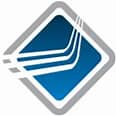

The Message Passing Interface (MPI) is a standardized and portable message-passing system that defines the syntax and semantics of a core set of library routines useful to a wide range of users writing portable message-passing programs in C, C++, and Fortran.

### Programming Model
MPI's programming model features:

- **Distributed Programming Model**: MPI primarily supports distributed computing, but also facilitates data parallel programming.
- **Hardware Platforms**: Compatible with distributed, shared, and hybrid platforms.
- **Explicit Parallelism**: The programmer is responsible for implementing all parallel constructs, providing fine-grained control over parallel execution.

While the number of tasks in an MPI program is static during runtime, MPI-2 has addressed the need for dynamic task creation.

### Benefits of MPI
MPI provides several key benefits:

- **Portability**: No need to modify your source code when porting applications to different platforms that support MPI.
- **Standardization**: MPI is the only message-passing library that can be considered a standard, with broad support across virtually all HPC platforms.
- **Functionality**: Over 115 routines are defined in MPI-1 alone, offering extensive capabilities for parallel programming.
- **Availability**: Numerous implementations of MPI are available, both from vendors and in the public domain.

### Checking the Version
In this environment, MPI is typically pre-installed by the system administrators. MPI implementations may include (but are not limited to):

- Open MPI
- Intel MPI
- MPICH2
- SGI's MPT

Before running MPI code, the appropriate MPI module (e.g., `module load openmpi`) must be loaded. You can check if MPI is correctly set up by running the following command:

```bash
$ mpiexec --version
mpiexec (OpenRTE) 1.8.8
```

MPI Header files:
C/C++: #include <mpi>
ForTran: include 'mpif.h'
Compiler wrappers:
Intel: (icc -lmpi) and (ifort -lmpi)
GNU: mpicc, mpif77, mpif90, mpicxx

Run the code below to see what version is intalled in this cluster:


In [1]:
import subprocess
import sys

def check_install_mpi():
    # Check if mpicc is installed
    mpicc_check = subprocess.run(["which", "mpicc"], capture_output=True, text=True)
    
    if mpicc_check.returncode == 0:
        print("mpicc is already installed.")
    else:
        print("mpicc is not installed. Installing MPI...")
        # Install OpenMPI
        install_process = subprocess.run(["sudo", "apt-get", "install", "-y", "openmpi-bin", "openmpi-common", "libopenmpi-dev"], capture_output=True, text=True)
        
        if install_process.returncode == 0:
            print("MPI installed successfully.")
        else:
            print("Error installing MPI.")
            print(install_process.stderr)
            sys.exit(1)

    # Check if mpirun is installed
    mpirun_check = subprocess.run(["which", "mpirun"], capture_output=True, text=True)
    
    if mpirun_check.returncode == 0:
        print("mpirun is already installed.")
    else:
        print("mpirun is not installed. Installing MPI...")
        # Install OpenMPI
        install_process = subprocess.run(["sudo", "apt-get", "install", "-y", "openmpi-bin", "openmpi-common", "libopenmpi-dev"], capture_output=True, text=True)
        
        if install_process.returncode == 0:
            print("MPI installed successfully.")
        else:
            print("Error installing MPI.")
            print(install_process.stderr)
            sys.exit(1)
    
    # Check and print mpiexec version
    mpiexec_version = subprocess.run(["mpiexec", "--version"], capture_output=True, text=True)
    
    if mpiexec_version.returncode == 0:
        print("MPIexec Version:")
        print(mpiexec_version.stdout)
    else:
        print("Error fetching mpiexec version.")
        print(mpiexec_version.stderr)

check_install_mpi()

# Enable oversubcription in the cluster
import os
os.environ["OMPI_MCA_rmaps_base_oversubscribe"] = "1"
def run_srun(command):
    os.system(f"srun --oversubscribe {command}")


mpicc is already installed.
mpirun is already installed.
MPIexec Version:
mpiexec (OpenRTE) 4.0.3

Report bugs to http://www.open-mpi.org/community/help/






Depending on the programming language you use, you will need to include the proper headed files and compile the program.


**MPI Header files:** 
```C/C++: #include <mpi>
ForTran: include 'mpif.h'
```

**Compiler wrappers:**
```Intel: (icc -lmpi) and (ifort -lmpi)
GNU: mpicc, mpif77, mpif90, mpicxx
```


### MPI program stucture

MPI uses objects called communicators and groups to define which collection of processes may communicate with each other. Most MPI routines require you to specify a communicator as an argument.

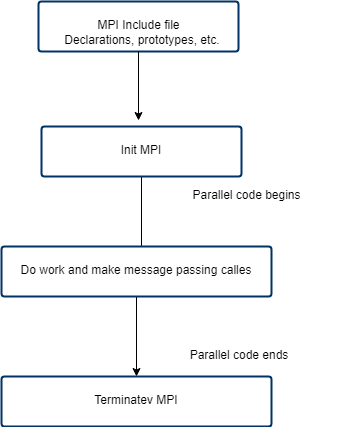

#### MPI program schema
It is very important to learn the MPI program structure before we proceed to coding message passing programs. Following are the common functions used while developing an MPI code:


**MPI Init:**

``MPI_Init (&argc,&argv)
MPI_INIT (ierr)
MPI intialisation.
``

**MPI_Comm_size:**

``MPI_Comm_size (comm,&size)
MPI_COMM_SIZE (comm,size,ierr)
``
Determines the number of processes in the group associated with a communicator.

**MPI_Comm_rank:**

``
MPI_Comm_rank (comm,&rank)
MPI_COMM_RANK (comm,rank,ierr)
``
Determines the rank (task ID) of the calling process within the communicator. Value 0...p-1

**MPI_Abort:**

``
MPI_Abort (comm,errorcode)
MPI_ABORT (comm,errorcode,ierr)
``
Terminates all MPI processes associated with the communicator.

**MPI_Finalize:**

``
MPI_Finalize ()
MPI_FINALIZE (ierr)
``
Terminates the MPI execution environment. This function should be the last MPI routine called.

Let's get introduced with the functions and environment veriables used in the code:

- **MPI_Init**, all of MPI's global and internal variables are constructed.
- **MPI_Comm_size** returns the size of a communicator and the built-in MPI_COMM_WORLD encloses all of the processes in the job, so this call should return the amount of processes that were requested for the job.
- **MPI_Comm_rank** returns the rank of a process in a communicator. Each process inside of a communicator is assigned an incremental rank starting from zero.
- **MPI_Finalize** is used to clean up the MPI environment. No more MPI calls can be made after this one.

As you can see this is a C program, so we will need to compile it. 


## MPI Hello World Example

In this exercise, we will write a basic MPI "Hello World" program and discuss how to run an MPI job across several processes. This exercise will cover the basics of initializing MPI, obtaining the number of processes and ranks, and printing a "Hello World" message from each process.

### Introduction to MPI

The Message Passing Interface (MPI) is a standardized and portable message-passing system designed to function on parallel computing architectures. MPI is commonly used in high-performance computing (HPC) environments to achieve parallelism across multiple processors.

In this example, we will use MPI to run a simple "Hello World" program across multiple processors. Each processor will print its rank, the total number of processors, and the name of the processor it is running on. This will help you understand the basic MPI concepts and how parallelism is achieved in MPI programs.


In [10]:
import os
import subprocess

# Define the path for the MPI program file
mpi_program_path = "mpi_hello.c"

# Remove the existing file if it exists
if os.path.exists(mpi_program_path):
    os.remove(mpi_program_path)

# Create and write the MPI program
mpi_program = """
#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <string.h>

int main(int argc, char** argv) {
    // Initialize the MPI environment
    MPI_Init(NULL, NULL);

    // Get the number of processes
    int world_size;
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);

    // Get the rank of the process
    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    // Get the name of the processor
    char processor_name[MPI_MAX_PROCESSOR_NAME];
    int name_len;
    MPI_Get_processor_name(processor_name, &name_len);

    // Generate a unique random seed for each process based on rank
    srand(time(NULL) + world_rank);

    // Generate a random number for each process
    int random_value = rand() % 100;

    // Get the current time
    time_t current_time;
    time(&current_time);
    char* time_string = ctime(&current_time);
    time_string[strlen(time_string) - 1] = '\\0';  // Remove newline from time string

    // Print off a hello world message with dynamic content
    printf("Hello world from process %d out of %d . Random value: %d. Time: %s\\n",
           world_rank, world_size, random_value, time_string);

    // Finalize the MPI environment.
    MPI_Finalize();
}
"""

# Write the MPI program to a file
with open(mpi_program_path, "w") as file:
    file.write(mpi_program)

print(f"MPI program written to {mpi_program_path}.")



MPI program written to mpi_hello.c.


Now compile and execute the code.

In [11]:
import subprocess

# Compile the MPI program using mpicc
compile_command = f"mpicc -o mpi_hello mpi_hello.c"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the MPI program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "mpi_hello"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program using mpirun with 4 processes
run_command = "mpirun -np 4 ./mpi_hello"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the MPI program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


Compiling the MPI program...
Compilation successful, executable created.
Running the MPI program...
Program Output:
 Hello world from process 0 out of 4 . Random value: 93. Time: Sat Sep  7 12:24:21 2024
Hello world from process 1 out of 4 . Random value: 87. Time: Sat Sep  7 12:24:21 2024
Hello world from process 2 out of 4 . Random value: 25. Time: Sat Sep  7 12:24:21 2024
Hello world from process 3 out of 4 . Random value: 25. Time: Sat Sep  7 12:24:21 2024




After compiling and running the MPI "Hello World" program, you should observe output from each process. Each process reports its rank, the total number of processes, and the name of the processor it is running on.

### Key Points:

1. **MPI Initialization**: The program starts by initializing the MPI environment using `MPI_Init`. This step is crucial as it sets up the necessary environment for MPI functions.

2. **Rank and Size**: Each process is assigned a unique rank, which can be used to identify it among the other processes. The total number of processes is referred to as the world size.

3. **Processor Name**: Each process can retrieve the name of the processor it is running on, which is especially useful in a distributed system.

4. **Parallel Execution**: By running the program with `mpirun -np 4 ./mpi_hello`, the program is executed in parallel across 4 processes. Each process runs independently and prints its information, demonstrating how MPI can be used to parallelize tasks.

5. **Finalization**: The program concludes by calling `MPI_Finalize`, which cleans up the MPI environment and ends the parallel execution.

This basic example provides a foundation for understanding how MPI works and how it can be used to develop parallel applications. In a more complex scenario, these principles can be extended to perform large-scale computations across many processors, significantly reducing execution time.



If you want to change the code you can do it from the left panel. Select your file inside folder mpi and modify it (do not forget to save it with File/save). 
Do not forget that you will need to compile it. You can reuse the previous code above or run the same commands directlyl in the terminal.

You can launch a terminal directly from jupyter launcher or just from docker (if from docker you can sue the `bash` command from docker to get a proper bash terminal). 

To do it from jupyter, start a Terminal in the Launcher tab. You can use the terminal to launchany command, including slurm jobs via commands.

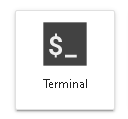

Try to change thenumber of MPI tasks when you run mpirun `-n 4` You do not need tocompile the program again for this.




## MPI Point to Point Communication
MPI point-to-point operations typically involve message passing between two, and only two, different MPI tasks. One task is performing a send operation and the other task is performing a matching receive operation. Different types of send and receive routines:

- Synchronous send
- Blocking send / blocking receive
- Non-blocking send / non-blocking receive
- Buffered send
- Combined send/receive
- "Ready" send

Any type of send routine can be paired with any type of receive routine.

### MPI Send / Receive

MPI point-to-point communication routines generally have an argument list that takes one of the following formats:

``MPI_Send (&buf,count,datatype,dest,tag,comm)
MPI_SEND (buf,count,datatype,dest,tag,comm,ierr)``

**Buffer**: Program address space that references the data that is to be sent or received. In most cases, this is simply the variable name that is be sent/received. For C programs, this argument is passed by reference and usually must be prepended with an ampersand: &var1.

**Data Count**: Indicates the number of data elements of a particular type to be sent.

**Data Type**: For reasons of portability, MPI predefines its elementary data types.

- `MPI_CHAR` – signed char
- `MPI_INT` – signed int
- `MPI_FLOAT` – float
- `MPI_DOUBLE` – double

You can also create your own derived data types.

**Destination**: An argument to send routines that indicates the process where a message should be delivered. Specified as the rank of the receiving process.

**Source**: An argument to receive routines that indicates the originating process of the message. Specified as the rank of the sending process. This may be set to the wild card MPI_ANY_SOURCE to receive a message from any task.

**Tag**: Arbitrary non-negative integer assigned by the programmer to uniquely identify a message. Send and receive operations should match message tags. For a receive operation, the wild card MPI_ANY_TAG can be used to receive any message regardless of its tag. The MPI standard guarantees that int can be used as tags, but most implementations allow a much larger range than this.

**Communicator**: Indicates the communication context, or set of processes for which the source or destination fields are valid. Unless the programmer is explicitly creating new communicators, the predefined communicator MPI_COMM_WORLD is usually used.

**Status**: For a receive operation, indicates the source of the message and the tag of the message. In C, this argument is a pointer to a predefined structure MPI_Status (ex. stat.MPI_SOURCE stat.MPI_TAG). Additionally, the actual number of bytes received are obtainable from Status via the MPI_Get_count routine.

**Request**: Used by non-blocking send and receive operations. Since non-blocking operations may return before the requested system buffer space is obtained, the system issues a unique "request number". The programmer uses this system assigned "handle" later (in a WAIT type routine) to determine completion of the non-blocking operation. In C, this argument is a pointer to a predefined structure MPI_Request.

Blocking sends: `MPI_Send(buffer,count,type,dest,tag,comm)` Non-blocking sends: `MPI_Isend(buffer,count,type,dest,tag,comm,request)` Blocking receive: `MPI_Recv(buffer,count,type,source,tag,comm,status)` Non-blocking receive: `MPI_Irecv(buffer,count,type,source,tag,comm,request)`

**MPI_Send**:Basic blocking send operation. Routine returns only after the application buffer in the sending task is free for reuse.

``MPI_Send (&buf,count,datatype,dest,tag,comm)
MPI_SEND (buf,count,datatype,dest,tag,comm,ierr)
MPI_Recv (&buf,count,datatype,source,tag,comm,&status)
MPI_RECV (buf,count,datatype,source,tag,comm,status,ierr)``

**Synchronous blocking send**:Send a message and block until the application buffer in the sending task is free for reuse and the destination process has started to receive the message.

``MPI_Ssend (&buf,count,datatype,dest,tag,comm)
MPI_SSEND (buf,count,datatype,dest,tag,comm,ierr)``

**Buffered blocking send**:permits the programmer to allocate the required amount of buffer space into which data can be copied until it is delivered. Insulates against the problems associated with insufficient system buffer space.

``MPI_Bsend (&buf,count,datatype,dest,tag,comm)
MPI_BSEND (buf,count,datatype,dest,tag,comm,ierr)``


## MPI Ping Pong Example

In this exercise, we will write an MPI program that demonstrates the basic communication between two processes using MPI's `send` and `receive` functions. This is often referred to as the "Ping Pong" example because one process sends a message to another, which then sends it back, creating a back-and-forth communication pattern.

### Introduction to MPI Send and Receive

MPI's `send` and `receive` functions are fundamental for point-to-point communication in parallel applications. These functions allow processes to exchange data in a distributed system, enabling coordination and collaboration between different parts of a parallel program.

In this example, we will implement a simple Ping Pong program where two processes exchange a message back and forth a certain number of times. This will help you understand the basics of message-passing in MPI and how data can be transferred between processes.


In [12]:
import os

# Define the path for the MPI program file
mpi_program_path = "mpi_pingpong.c"

# Remove the existing file if it exists
if os.path.exists(mpi_program_path):
    os.remove(mpi_program_path)

# Create and write the MPI program
mpi_program = """
#include <mpi.h>
#include <stdio.h>

#define PING_PONG_LIMIT 10

int main(int argc, char** argv) {
    MPI_Init(NULL, NULL);

    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    int world_size;
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);

    if (world_size != 2) {
        fprintf(stderr, "World size must be two for %s\\n", argv[0]);
        MPI_Abort(MPI_COMM_WORLD, 1);
    }

    int ping_pong_count = 0;
    int partner_rank = (world_rank + 1) % 2;

    while (ping_pong_count < PING_PONG_LIMIT) {
        if (world_rank == ping_pong_count % 2) {
            // Increment the ping_pong_count before you send it
            ping_pong_count++;
            MPI_Send(&ping_pong_count, 1, MPI_INT, partner_rank, 0, MPI_COMM_WORLD);
            printf("Process %d sent ping_pong_count %d to process %d\\n", world_rank, ping_pong_count, partner_rank);
        } else {
            MPI_Recv(&ping_pong_count, 1, MPI_INT, partner_rank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            printf("Process %d received ping_pong_count %d from process %d\\n", world_rank, ping_pong_count, partner_rank);
        }
    }

    MPI_Finalize();
    return 0;
}
"""

# Write the MPI program to a file
with open(mpi_program_path, "w") as file:
    file.write(mpi_program)

print(f"MPI program written to {mpi_program_path}.")


MPI program written to mpi_pingpong.c.


Now compiling and executing the code.

In [13]:
import subprocess

# Compile the MPI program using mpicc
compile_command = f"mpicc -o mpi_pingpong mpi_pingpong.c"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the MPI program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "mpi_pingpong"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program using mpirun with 2 processes
run_command = f"mpirun --oversubscribe -np 2 ./mpi_pingpong"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the MPI program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


Compiling the MPI program...
Compilation successful, executable created.
Running the MPI program...
Program Output:
 Process 0 sent ping_pong_count 1 to process 1
Process 1 received ping_pong_count 1 from process 0
Process 1 sent ping_pong_count 2 to process 0
Process 0 received ping_pong_count 2 from process 1
Process 0 sent ping_pong_count 3 to process 1
Process 1 received ping_pong_count 3 from process 0
Process 1 sent ping_pong_count 4 to process 0
Process 0 received ping_pong_count 4 from process 1
Process 0 sent ping_pong_count 5 to process 1
Process 1 received ping_pong_count 5 from process 0
Process 1 sent ping_pong_count 6 to process 0
Process 0 received ping_pong_count 6 from process 1
Process 0 sent ping_pong_count 7 to process 1
Process 1 received ping_pong_count 7 from process 0
Process 1 sent ping_pong_count 8 to process 0
Process 0 received ping_pong_count 8 from process 1
Process 0 sent ping_pong_count 9 to process 1
Process 1 received ping_pong_count 9 from process 0
P


After compiling and running the MPI Ping Pong program, you should observe a series of messages being sent back and forth between two processes.

### Key Points:

1. **MPI Initialization**: The program begins by initializing the MPI environment with `MPI_Init`. This sets up the necessary environment for MPI communication.

2. **Process Rank and World Size**: Each process obtains its rank using `MPI_Comm_rank` and the total number of processes using `MPI_Comm_size`. In this example, the program requires exactly two processes to demonstrate the Ping Pong communication.

3. **Ping Pong Logic**: The processes take turns sending and receiving a message (an integer representing the ping-pong count). The process with rank 0 starts the exchange, sending the message to process 1. The message is then sent back and forth until the ping-pong count reaches a predefined limit.

4. **MPI Send and Receive**: The `MPI_Send` function is used to send the message, and `MPI_Recv` is used to receive it. These functions are fundamental for point-to-point communication in MPI. The exchange of messages demonstrates how data can be transferred between processes in a parallel program.

5. **Finalization**: The program concludes with `MPI_Finalize`, which cleans up the MPI environment and ends the parallel execution.

### Observing the Communication:

Each process prints a message each time it sends or receives the ping-pong count. This output allows you to trace the communication between the two processes, showing how they work together to increment and transfer the count until the limit is reached.



## MPI Synchronous vs. Asynchronous Communication

In this example, we will explore the difference between synchronous and asynchronous communication in MPI. 

### Synchronous Communication
In synchronous communication, the `MPI_Ssend` function is used for sending messages. This function will not return until the matching `MPI_Recv` has begun, ensuring that both the sender and receiver are synchronized during the communication. 

### Asynchronous Communication
In contrast, asynchronous communication uses `MPI_Isend` and `MPI_Irecv`, which return immediately without waiting for the corresponding receive or send operation to begin. This allows the program to overlap communication with computation, potentially improving performance in parallel applications.

We will compare these two approaches by measuring the time taken to send and receive messages between two processes.


In [14]:
import os

# Define the path for the MPI program file
mpi_program_path = "mpi_sync_async.c"

# Remove the existing file if it exists
if os.path.exists(mpi_program_path):
    os.remove(mpi_program_path)

# Create and write the MPI program
mpi_program = """
#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>

#define MESSAGE_SIZE 1000000

void synchronous_communication(int world_rank, int partner_rank) {
    int *message = (int*)malloc(MESSAGE_SIZE * sizeof(int));
    if (world_rank == 0) {
        double start_time = MPI_Wtime();
        MPI_Ssend(message, MESSAGE_SIZE, MPI_INT, partner_rank, 0, MPI_COMM_WORLD);
        double end_time = MPI_Wtime();
        printf("Synchronous send time: %f seconds\\n", end_time - start_time);
    } else if (world_rank == 1) {
        MPI_Recv(message, MESSAGE_SIZE, MPI_INT, partner_rank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    }
    free(message);
}

void asynchronous_communication(int world_rank, int partner_rank) {
    int *message = (int*)malloc(MESSAGE_SIZE * sizeof(int));
    MPI_Request request;
    if (world_rank == 0) {
        double start_time = MPI_Wtime();
        MPI_Isend(message, MESSAGE_SIZE, MPI_INT, partner_rank, 0, MPI_COMM_WORLD, &request);
        MPI_Wait(&request, MPI_STATUS_IGNORE);
        double end_time = MPI_Wtime();
        printf("Asynchronous send time: %f seconds\\n", end_time - start_time);
    } else if (world_rank == 1) {
        MPI_Irecv(message, MESSAGE_SIZE, MPI_INT, partner_rank, 0, MPI_COMM_WORLD, &request);
        MPI_Wait(&request, MPI_STATUS_IGNORE);
    }
    free(message);
}

int main(int argc, char** argv) {
    MPI_Init(NULL, NULL);

    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    int world_size;
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);

    if (world_size != 2) {
        fprintf(stderr, "World size must be two for %s\\n", argv[0]);
        MPI_Abort(MPI_COMM_WORLD, 1);
    }

    int partner_rank = (world_rank + 1) % 2;

    // Perform synchronous communication
    synchronous_communication(world_rank, partner_rank);

    // Perform asynchronous communication
    asynchronous_communication(world_rank, partner_rank);

    MPI_Finalize();
    return 0;
}
"""

# Write the MPI program to a file
with open(mpi_program_path, "w") as file:
    file.write(mpi_program)

print(f"MPI program written to {mpi_program_path}.")


MPI program written to mpi_sync_async.c.


In [15]:
import subprocess

# Compile the MPI program using mpicc
compile_command = f"mpicc -o mpi_sync_async mpi_sync_async.c"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the MPI program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "mpi_sync_async"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program using mpirun with 2 processes
run_command = f"mpirun --oversubscribe -np 2 ./mpi_sync_async"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the MPI program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


Compiling the MPI program...
Compilation successful, executable created.
Running the MPI program...
Program Output:
 Synchronous send time: 0.002307 seconds
Asynchronous send time: 0.001881 seconds




After running the MPI program, you should observe the time taken for synchronous and asynchronous communication between the two processes.

### Synchronous Communication

- **Synchronous Send (`MPI_Ssend`)**: This function ensures that the sending process waits until the matching receive operation begins. The time reported by the program for this operation includes both the communication time and the waiting time until the receive operation starts.

### Asynchronous Communication

- **Asynchronous Send (`MPI_Isend`) and Receive (`MPI_Irecv`)**: These functions allow the sending and receiving operations to proceed without waiting for each other. The send operation returns immediately, allowing the program to perform other computations while the data is being sent. The communication time reported by the program may be shorter than that for synchronous communication, especially if the communication and computation overlap effectively.

### Performance Comparison

By comparing the time taken for synchronous and asynchronous communication, you can observe the potential performance benefits of using asynchronous communication, particularly in scenarios where computation and communication can be overlapped.


## MPI Point-to-Point vs. Collective Communication and Custom Data Types

In this example, we will explore the difference between point-to-point and collective communication in MPI and introduce the concept of custom data types.

### Point-to-Point Communication
Point-to-point communication involves direct communication between two MPI processes. This includes `MPI_Send` and `MPI_Recv` for sending and receiving messages, respectively.

### Collective Communication
Collective communication involves communication among all processes in a communicator. Examples include `MPI_Bcast`, which broadcasts a message from one process to all other processes, and `MPI_Gather`, which gathers messages from all processes to a single process.

### Custom Data Types
MPI provides the ability to define custom data types, allowing complex data structures to be sent and received in a single MPI communication operation. This can be particularly useful when dealing with structured data such as arrays of structs.


In [16]:
import os

# Define the path for the MPI program file
mpi_program_path = "mpi_point_to_point_collective.c"

# Remove the existing file if it exists
if os.path.exists(mpi_program_path):
    os.remove(mpi_program_path)

# Create and write the MPI program
mpi_program = """
#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>

// Define a custom data type for a struct containing an integer and a double
typedef struct {
    int id;
    double value;
} custom_data_t;

void define_custom_data_type(MPI_Datatype* custom_data_type) {
    int lengths[2] = {1, 1};
    MPI_Aint offsets[2];
    offsets[0] = offsetof(custom_data_t, id);
    offsets[1] = offsetof(custom_data_t, value);
    MPI_Datatype types[2] = {MPI_INT, MPI_DOUBLE};
    MPI_Type_create_struct(2, lengths, offsets, types, custom_data_type);
    MPI_Type_commit(custom_data_type);
}

void point_to_point_communication(int world_rank, int world_size, MPI_Datatype custom_data_type) {
    custom_data_t data;
    if (world_rank == 0) {
        data.id = 1;
        data.value = 3.14;
        MPI_Send(&data, 1, custom_data_type, 1, 0, MPI_COMM_WORLD);
        printf("Process 0 sent data to Process 1: id = %d, value = %f\\n", data.id, data.value);
    } else if (world_rank == 1) {
        MPI_Recv(&data, 1, custom_data_type, 0, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
        printf("Process 1 received data from Process 0: id = %d, value = %f\\n", data.id, data.value);
    }
}

void collective_communication(int world_rank, int world_size, MPI_Datatype custom_data_type) {
    custom_data_t data;
    data.id = world_rank;
    data.value = world_rank * 2.0;
    
    custom_data_t* gathered_data = NULL;
    if (world_rank == 0) {
        gathered_data = (custom_data_t*)malloc(world_size * sizeof(custom_data_t));
    }

    MPI_Gather(&data, 1, custom_data_type, gathered_data, 1, custom_data_type, 0, MPI_COMM_WORLD);

    if (world_rank == 0) {
        printf("Process 0 gathered data from all processes:\\n");
        for (int i = 0; i < world_size; i++) {
            printf("Process %d: id = %d, value = %f\\n", i, gathered_data[i].id, gathered_data[i].value);
        }
        free(gathered_data);
    }
}

int main(int argc, char** argv) {
    MPI_Init(NULL, NULL);

    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    int world_size;
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);

    if (world_size < 2) {
        fprintf(stderr, "World size must be greater than one for %s\\n", argv[0]);
        MPI_Abort(MPI_COMM_WORLD, 1);
    }

    MPI_Datatype custom_data_type;
    define_custom_data_type(&custom_data_type);

    // Perform point-to-point communication
    point_to_point_communication(world_rank, world_size, custom_data_type);

    // Perform collective communication
    collective_communication(world_rank, world_size, custom_data_type);

    MPI_Type_free(&custom_data_type);
    MPI_Finalize();
    return 0;
}
"""

# Write the MPI program to a file
with open(mpi_program_path, "w") as file:
    file.write(mpi_program)

print(f"MPI program written to {mpi_program_path}.")


MPI program written to mpi_point_to_point_collective.c.


Comile and execute the program

In [17]:
import subprocess

# Compile the MPI program using mpicc
compile_command = f"mpicc -o mpi_point_to_point_collective mpi_point_to_point_collective.c"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the MPI program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "mpi_point_to_point_collective"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program using mpirun with 4 processes
run_command = f"mpirun --oversubscribe -np 4 ./mpi_point_to_point_collective"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the MPI program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


Compiling the MPI program...
Compilation successful, executable created.
Running the MPI program...
Program Output:
 Process 0 sent data to Process 1: id = 1, value = 3.140000
Process 1 received data from Process 0: id = 1, value = 3.140000
Process 0 gathered data from all processes:
Process 0: id = 0, value = 0.000000
Process 1: id = 1, value = 2.000000
Process 2: id = 2, value = 4.000000
Process 3: id = 3, value = 6.000000



## Explanation of the Output

### Point-to-Point Communication
In this part of the program, process 0 sends a custom data structure containing an integer and a double to process 1. The program uses `MPI_Send` and `MPI_Recv` for this communication, which are typical point-to-point communication functions. The output will show that process 1 successfully received the data sent by process 0.

### Collective Communication
Here, each process prepares a custom data structure containing its rank and a value derived from its rank. The program uses `MPI_Gather` to collect these structures from all processes into a single array on process 0. This is an example of collective communication, where data from all processes is gathered into one process. The output will show the data from all processes gathered together on process 0.

### Custom Data Types
The custom data type used in this example allows the program to send and receive a complex structure (a struct containing an integer and a double) in a single MPI communication operation. This simplifies the code and makes the communication more efficient, especially when dealing with structured data.

By running this program, you will see the practical differences between point-to-point and collective communication and understand how custom data types can be used to handle complex data structures in MPI.


If you want to change the code you can do it from the left panel. Select your file inside folder mpi and modify it (do not forget to save it with File/save). Do not forget that you will need to compile it. You can reuse the previous code above or run the same commands directlyl in the terminal.

You can launch a terminal directly from jupyter launcher or just from docker (if from docker you can sue the bash command from docker to get a proper bash terminal).

To do it from jupyter, start a Terminal in the Launcher tab. You can use the terminal to launchany command, including slurm jobs via commands.


This is the end of the MPI assignment! 
